In [1]:
from __future__ import print_function, division
import pylab as pl
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
import statsmodels.api as sm
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Read in Data

In [2]:
if os.path.isfile(os.getenv("PUIDATA") + "/MTA_Fare.npy"):
    print("Data already there!")
else:
    os.system("curl -LJO https://raw.github.com/fedhere/PUI2018_fb55/master/HW11_fb55/MTA_Fare.npy")
    os.system("unzip " + os.getenv("PUIDATA") + "/MTA_Fare.npy")

Data already there!


In [3]:
os.chdir(os.getenv("PUIDATA"))

In [4]:
mta = np.load("MTA_Fare.npy")

In [5]:
print ("MTA array shape:", mta.shape)
print ("MTA array shape summed over all ride types:", np.nansum(mta,axis=1).shape)

MTA array shape: (600, 23, 194)
MTA array shape summed over all ride types: (600, 194)


In [6]:
#ridership type list
card_types = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
print("number of ride types", len(card_types))

number of ride types 23


In [7]:
mta = mta.astype(float)
mta[mta == -1] = np.nan
len(mta[mta == -1])

0

In [8]:
#This is the information I recieved about the data: 
#"each time series (per station, per ticket type) contains the number of swipes per week 
#for 194 weeks from 05/19/2010 to 02/19/2014

weeks = pd.date_range(start='05/19/2010', periods=194, freq='W')
weeks

DatetimeIndex(['2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27', '2010-07-04', '2010-07-11',
               '2010-07-18', '2010-07-25',
               ...
               '2013-12-01', '2013-12-08', '2013-12-15', '2013-12-22',
               '2013-12-29', '2014-01-05', '2014-01-12', '2014-01-19',
               '2014-01-26', '2014-02-02'],
              dtype='datetime64[ns]', length=194, freq='W-SUN')

#### Plot the data in log space

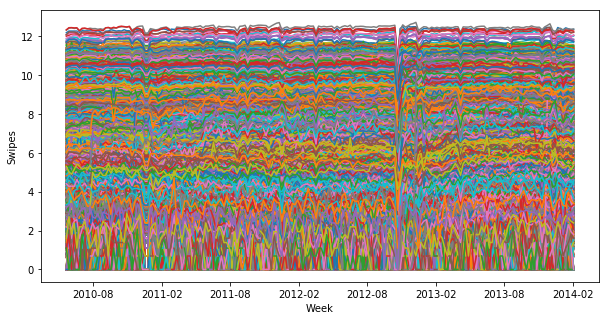

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_ylabel("Swipes")
ax.set_xlabel("Week")

for station in range(np.size(mta,0)):
    for card_type in range(np.size(mta,1)):
        ax.plot(weeks, np.log(mta[station][card_type]))

Figure showing the number of swipes in log space by card type (color) and week (x-axis) over 600 MTA Subway Stations.

### Fourier Transformation

In [10]:
#sum along card axis so we have total rides per station per week for all card types
card_sum = np.nansum(mta, axis=1)

In [13]:
np.size(card_sum,0)

600

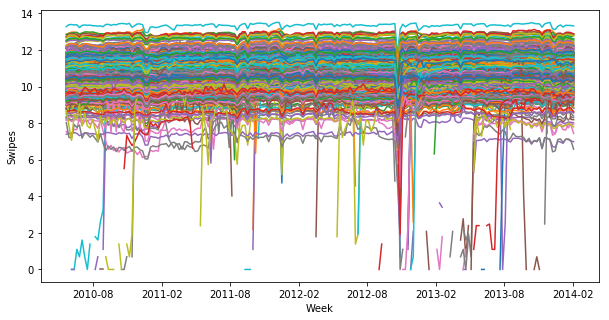

In [14]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_ylabel("Swipes")
ax.set_xlabel("Week")

for station in range(np.size(card_sum,0)):
        ax.plot(weeks, np.log(card_sum[station]))

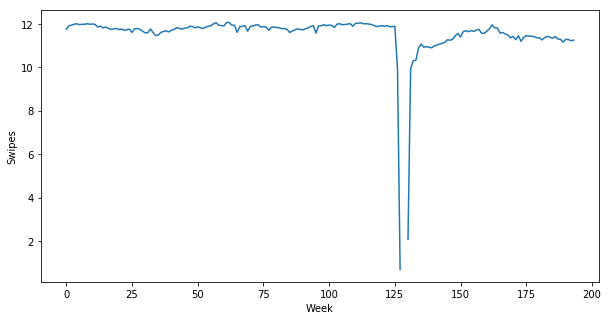

In [17]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_ylabel("Swipes")
ax.set_xlabel("Week")

ax.plot(np.log(card_sum[0]))

In [24]:
fft = np.fft.rfft(card_sum[0])

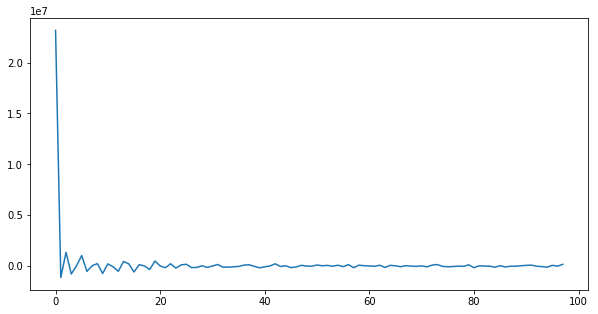

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(fft)